<a href="https://colab.research.google.com/github/nazalnihad/image_processing/blob/main/lapalacian_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


In [10]:
img = cv2.imread('/content/lena.png')
bw_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [69]:
laplacian_filter_1 = np.array([[0,1,0],
                              [1,-4,1],
                              [0,1,0]])

laplacian_filter_2 = np.array([[1,1,1],
                              [1,-8,1],
                              [1,1,1]])

In [146]:
def pad_filter(img, filter_kernel):
    height, width = img.shape
    kernel_height, kernel_width = filter_kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    result = np.zeros_like(img)

    for i in range(pad_height, height + pad_height):
        for j in range(pad_width, width + pad_width):
            region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            result[i - pad_height, j - pad_width] = np.sum(region * filter_kernel)

    return result

In [149]:
filter_1 = pad_filter(bw_img, laplacian_filter_1)
filter_2 = pad_filter(bw_img, laplacian_filter_2)


In [150]:
sharpened_image_1 = bw_img-filter_1
sharpened_image_2 = bw_img-filter_2

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)
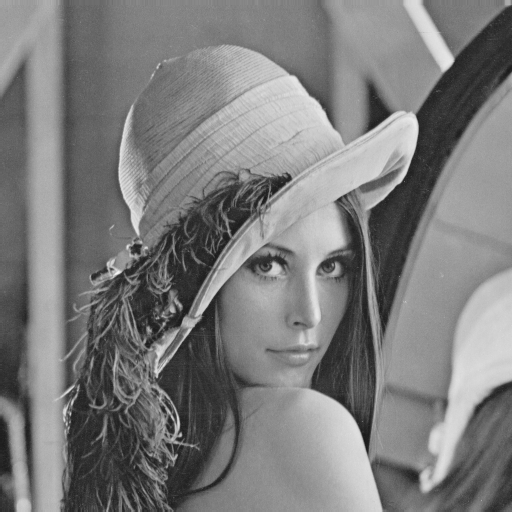

In [64]:
bw_img

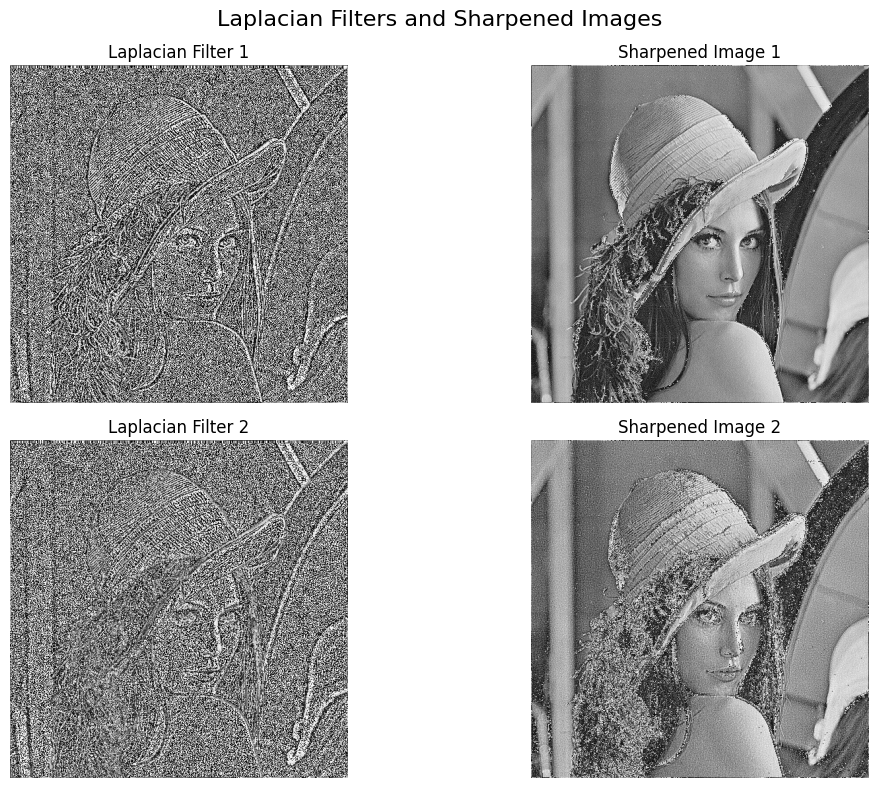

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Laplacian Filters and Sharpened Images', fontsize=16)

axes[0, 0].imshow(cv2.cvtColor(filter_1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Laplacian Filter 1')
axes[0, 0].axis('off')

axes[0, 1].imshow(sharpened_image_1, cmap='gray')
axes[0, 1].set_title('Sharpened Image 1')
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(filter_2, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Laplacian Filter 2')
axes[1, 0].axis('off')

axes[1, 1].imshow(sharpened_image_2, cmap='gray')
axes[1, 1].set_title('Sharpened Image 2')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

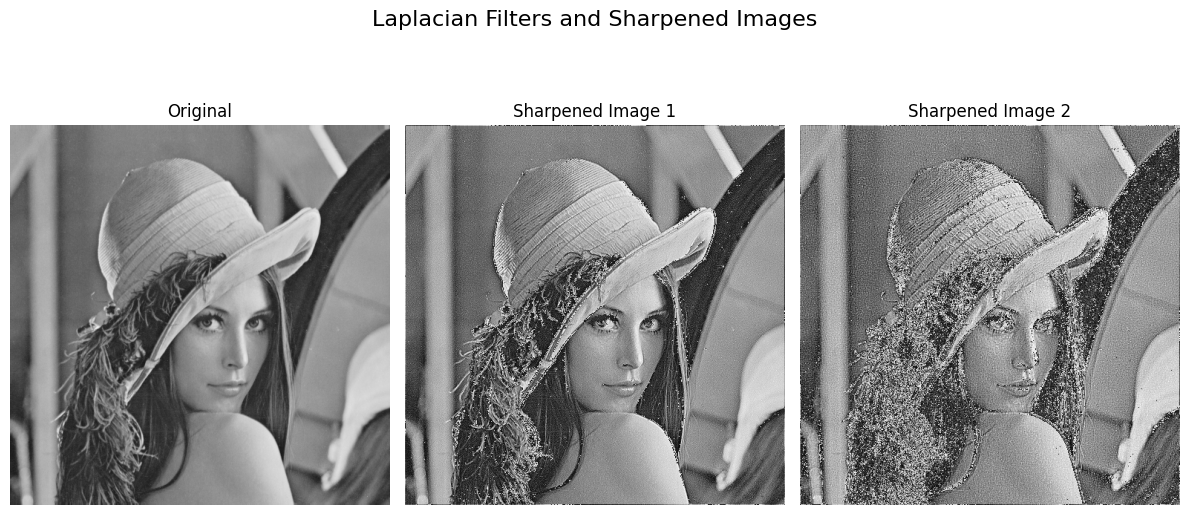

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
fig.suptitle('Laplacian Filters and Sharpened Images', fontsize=16)

# Original Image
axes[0].imshow(cv2.cvtColor(bw_img, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

# Sharpened Image 1
axes[1].imshow(sharpened_image_1, cmap='gray')
axes[1].set_title('Sharpened Image 1')
axes[1].axis('off')

# Sharpened Image 2
axes[2].imshow(sharpened_image_2, cmap='gray')
axes[2].set_title('Sharpened Image 2')
axes[2].axis('off')

plt.tight_layout()
plt.show()

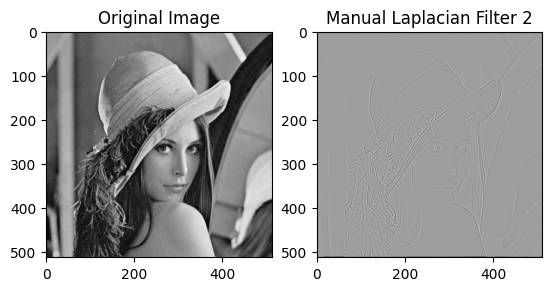

In [154]:
import numpy as np
import matplotlib.pyplot as plt

def convolve2D(image, kernel):
    m, n = image.shape
    k_m, k_n = kernel.shape
    pad_m, pad_n = k_m // 2, k_n // 2

    # pad  image
    padded_image = np.pad(image, ((pad_m, pad_m), (pad_n, pad_n)), mode='constant', constant_values=0)

    result = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            result[i, j] = np.sum(padded_image[i:i+k_m, j:j+k_n] * kernel)

    return result

def laplacian_filter_manual(image):
    # kernel
    kernel1 = laplacian_filter_1
    kernel2 = laplacian_filter_2

    # convolution
    result_1 = convolve2D(image, kernel1)
    result_2 = convolve2D(image, kernel2)

    return result_1,result_2

# Read an example image
image_path = "/content/lena.png"  # Replace with the actual path to your image
original_image = np.array(Image.open(image_path).convert('L'))

# Apply Laplacian filter manually
laplacian_result_manual = laplacian_filter_manual(original_image)

# Display the original and filtered images
plt.subplot(121), plt.imshow(original_image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(laplacian_result_manual[0], cmap='gray'), plt.title('Manual Laplacian Filter 1')
plt.subplot(122), plt.imshow(laplacian_result_manual[1], cmap='gray'), plt.title('Manual Laplacian Filter 2')
plt.show()


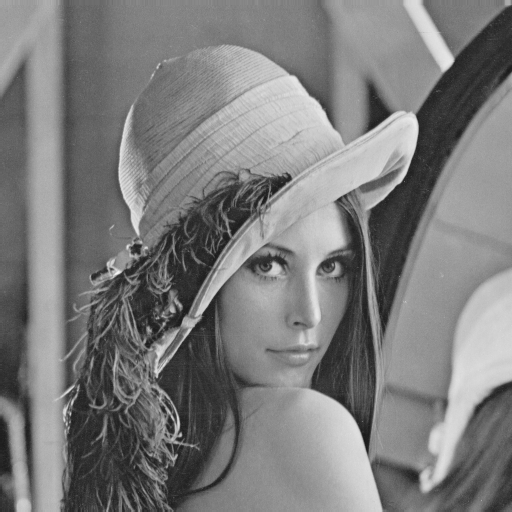

Original Image


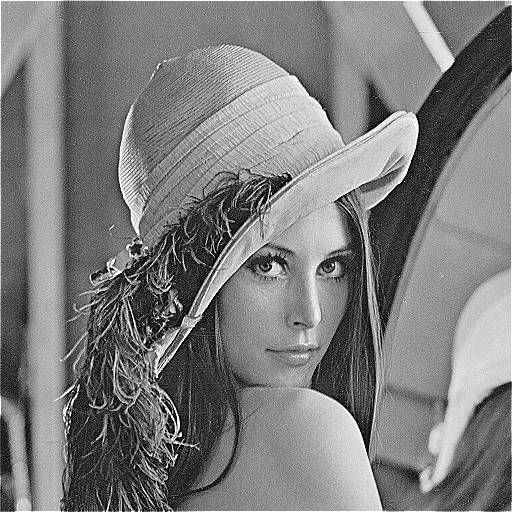

Sharpened 1


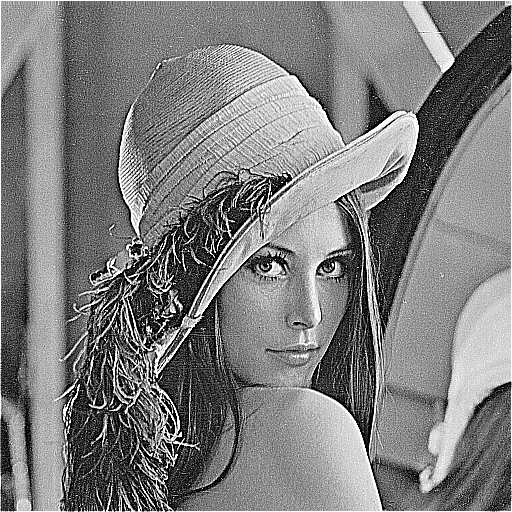

Sharpened 2


In [156]:
cv2_imshow(original_image)
print("Original Image")

# Display sharpened image 1
sharpened_1 = original_image - laplacian_result_manual[0]
cv2_imshow(sharpened_1)
print("Sharpened 1")

# Display sharpened image 2
sharpened_2 = original_image - laplacian_result_manual[1]
cv2_imshow(sharpened_2)
print("Sharpened 2")